In [50]:
import pandas as pd

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
train_df = pd.read_csv('twitter_training.csv')
validation_df = pd.read_csv('twitter_validation.csv')

In [19]:
train_df.columns=['id','information','type','text']
train_df.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [20]:
validation_df.columns=['id','information','type','text']
validation_df.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [21]:
train_df.shape

(74681, 4)

In [22]:
validation_df.shape

(999, 4)

In [23]:
print("Missing values in Training Dataset:")
print(train_df.isnull().sum())

Missing values in Training Dataset:
id               0
information      0
type             0
text           686
dtype: int64


In [26]:
# Check for missing values in the validation dataset
print("Missing values in Validation Dataset:")
print(validation_df.isnull().sum())

Missing values in Validation Dataset:
id             0
information    0
type           0
text           0
dtype: int64


In [27]:
train_df = train_df.dropna(subset=['text'])

In [28]:
# Check for missing values in the training dataset
print("Missing values in Training Dataset:")
print(train_df.isnull().sum())

Missing values in Training Dataset:
id             0
information    0
type           0
text           0
dtype: int64


In [29]:
train_df.shape

(73995, 4)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           73995 non-null  int64 
 1   information  73995 non-null  object
 2   type         73995 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [31]:
train_df['type'].value_counts()

type
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

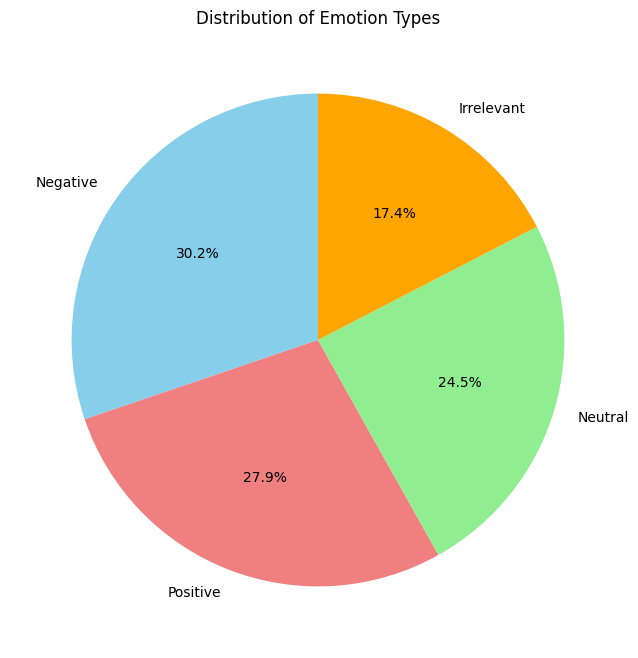

In [32]:
import matplotlib.pyplot as plt

# Check the distribution of the 'type' column
type_counts = train_df['type'].value_counts()

# Define colors for each emotion type
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Emotion Types')
plt.show()

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)
train_df

,id,information,type,text,preprocessed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


In [35]:
# Apply the preprocess_text function to the 'text' column
validation_df['preprocessed_text'] = validation_df['text'].apply(preprocess_text)
validation_df

,id,information,type,text,preprocessed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the 'max_features' parameter based on your dataset

# Fit and transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(train_df['preprocessed_text'])

# Transform the validation data using the same vectorizer
tfidf_validation_features = tfidf_vectorizer.transform(validation_df['preprocessed_text'])

# Display the shape of the TF-IDF features
print(f"TF-IDF Training Features Shape: {tfidf_train_features.shape}")
print(f"TF-IDF Validation Features Shape: {tfidf_validation_features.shape}")

TF-IDF Training Features Shape: (73995, 5000)
TF-IDF Validation Features Shape: (999, 5000)


In [37]:
pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 109.5 kB/s eta 0:15:11
   ---------------------------------------- 0.0/99.8 MB 109.5 kB/s eta 0:15:11
   ---------------------------------------- 0.1/99.8 MB 196.9 kB/s eta 0:08:27
   ---------------------------------------- 0.1/99.8 MB 249.8 kB/s eta 0:06:40
   ---------------------------------------- 0.1/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.1/9

In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the class labels in both training and validation datasets
train_labels_encoded = label_encoder.fit_transform(train_df['type'])
validation_labels_encoded = label_encoder.transform(validation_df['type'])

In [115]:
# Assuming 'type' is the target variable
X_train = train_df['preprocessed_text']
y_train = train_df['type']

X_validation = validation_df['preprocessed_text']
y_validation = validation_df['type']


In [116]:
# Fit and transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(X_train)

# Transform the validation data using the same vectorizer
tfidf_validation_features = tfidf_vectorizer.transform(X_validation)


In [117]:
from sklearn.preprocessing import LabelEncoder
# Encode the class labels in both training and validation datasets
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_validation_encoded = label_encoder.transform(y_validation)


In [124]:
import numpy as np
from scipy.sparse import issparse
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split


def calculate_prior(y):
    """
    Calculate the prior probability P(y) for each class.
    
    Parameters:
    - y: numpy array, target variable
    
    Returns:
    - priors: dictionary, prior probabilities for each class
    """
    classes, counts = np.unique(y, return_counts=True)
    priors = dict(zip(classes, counts / len(y)))
    return priors

def calculate_likelihood(X, y, vectorizer, alpha=0.001):
    """
    Calculate the likelihood probabilities for each word and class.

    Parameters:
    - X: scipy sparse matrix, feature matrix
    - y: numpy array, target variable
    - vectorizer: CountVectorizer or TfidfVectorizer
    - alpha: Laplace smoothing parameter

    Returns:
    - likelihoods: 2D NumPy array, likelihood probabilities for each word and class
    """
    if issparse(X):
        X = X.tocsr()

    num_classes = len(np.unique(y))
    num_features = X.shape[1]
    likelihoods = np.zeros((num_classes, num_features))

    for c in np.unique(y):
        class_indices = (y == c)
        class_word_counts = X[class_indices].sum(axis=0)
        total_word_counts = class_word_counts.sum()

        # Laplace smoothing
        likelihoods[c, :] = (class_word_counts + alpha) / (total_word_counts + alpha * num_features)

    return likelihoods

def naive_bayes_multinomial(X, priors, likelihoods, alpha=0.001):
    """
    Make predictions using the Multinomial Naive Bayes model.

    Parameters:
    - X: scipy sparse matrix, feature matrix
    - priors: dictionary, prior probabilities for each class
    - likelihoods: 2D NumPy array, likelihood probabilities for each word and class
    - alpha: Laplace smoothing parameter

    Returns:
    - predictions: numpy array, predicted classes
    """
    if issparse(X):
        X = X.tocsr()

    predictions = []
    num_classes, num_features = likelihoods.shape

    for i in range(X.shape[0]):
        non_zero_indices = X[i].nonzero()[1]

        # Calculate the log-likelihood for each class with Laplace smoothing
        log_likelihoods = np.log(likelihoods[:, non_zero_indices] + alpha)

        # Calculate the log-posterior probability for each class
        log_posteriors = np.log(list(priors.values())) + log_likelihoods.sum(axis=1)

        # Choose the class with the highest log-posterior probability
        predicted_class = np.argmax(log_posteriors)
        predictions.append(predicted_class)

    return np.array(predictions)



In [119]:
# Calculate prior and likelihood for the training set
priors_train = calculate_prior(y_train_encoded)
likelihoods_train = calculate_likelihood(tfidf_train_features, y_train_encoded, tfidf_vectorizer)

# Make predictions on the training set
train_predictions = naive_bayes_multinomial(tfidf_train_features, priors_train, likelihoods_train)

# Calculate prior and likelihood for the validation set
priors_validation = calculate_prior(y_validation_encoded)
likelihoods_validation = calculate_likelihood(tfidf_validation_features, y_validation_encoded, tfidf_vectorizer)

# Make predictions on the validation set
validation_predictions = naive_bayes_multinomial(tfidf_validation_features, priors_validation, likelihoods_validation)


In [120]:
from sklearn.metrics import accuracy_score, classification_report

# Decode the encoded predictions
train_predictions_decoded = label_encoder.inverse_transform(train_predictions)
validation_predictions_decoded = label_encoder.inverse_transform(validation_predictions)

# Evaluate the performance on the training set
accuracy_train = accuracy_score(y_train, train_predictions_decoded) * 100
classification_report_train = classification_report(y_train, train_predictions_decoded)

# Evaluate the performance on the validation set
accuracy_validation = accuracy_score(y_validation, validation_predictions_decoded) * 100
classification_report_validation = classification_report(y_validation, validation_predictions_decoded)

# Display the results
print(f"Multinomial Naive Bayes Training Accuracy: {accuracy_train:.2f}%")
print("Multinomial Naive Bayes Training Classification Report:")
print(classification_report_train)

print(f"Multinomial Naive Bayes Validation Accuracy: {accuracy_validation:.2f}%")
print("Multinomial Naive Bayes Validation Classification Report:")
print(classification_report_validation)


Multinomial Naive Bayes Training Accuracy: 57.13%
Multinomial Naive Bayes Training Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.63      0.20      0.31     12875
    Negative       0.58      0.75      0.66     22358
     Neutral       0.68      0.38      0.48     18108
    Positive       0.52      0.77      0.62     20654

    accuracy                           0.57     73995
   macro avg       0.60      0.53      0.52     73995
weighted avg       0.60      0.57      0.54     73995

Multinomial Naive Bayes Validation Accuracy: 90.19%
Multinomial Naive Bayes Validation Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.93      0.87      0.90       171
    Negative       0.92      0.92      0.92       266
     Neutral       0.93      0.86      0.89       285
    Positive       0.84      0.95      0.89       277

    accuracy                           0.90       999
   macro avg       0.91

In [107]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the TF-IDF training features and encoded labels
xgb_classifier.fit(tfidf_train_features, train_labels_encoded)

# Predict the encoded labels for the TF-IDF validation features
validation_predictions_xgb_encoded = xgb_classifier.predict(tfidf_validation_features)

# Decode the predicted labels back to the original class labels
validation_predictions_xgb = label_encoder.inverse_transform(validation_predictions_xgb_encoded)

In [45]:
# Evaluate the performance of the XGBoost classifier
accuracy_xgb = accuracy_score(validation_df['type'], validation_predictions_xgb)
accuracy_percentage_xgb = accuracy_xgb * 100
print(f"XGBoost Accuracy: {accuracy_percentage_xgb:.2f}%")


XGBoost Accuracy: 73.77%


In [46]:
# Display additional classification metrics for XGBoost
print("XGBoost Classification Report:")
print(classification_report(validation_df['type'], validation_predictions_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.60      0.70       171
    Negative       0.65      0.88      0.75       266
     Neutral       0.78      0.65      0.71       285
    Positive       0.76      0.78      0.77       277

    accuracy                           0.74       999
   macro avg       0.76      0.73      0.73       999
weighted avg       0.75      0.74      0.74       999



In [48]:
# Assuming you have defined the preprocess_text function

# Example user input
user_input = "Platinum is the best loot @Borderlands"

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Positive


In [49]:
# Example user input
user_input = "This is shitty. I get that profit-wise it was less business expected prior to a huge problem."

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Negative
